# Stock Technical Analysis: Python Tutorial

### Update: 25/04/2020 
Emailto: mhcrnl@gmail.com

MACD (Moving Average Convergence/Divergence)

Contact: andrewshamlet@gmail.com // @andrewshamlet

Python streamlines tasks requiring multiple steps in a single block of code. For this reason, it is a great tool for querying and performing analysis on data.

In this post, we outline steps for calculating a stock’s MACD indicator. But first, what is MACD (Moving Average Convergence/Divergence)?

Developed by Gerald Appel in the late seventies, MACD is one of the simplest and most effective momentum indicators available. MACD turns two trend-following indicators, moving averages, into a momentum oscillator by subtracting the longer moving average from the shorter moving average. A nine-day EMA of the MACD, called the "signal line", is then plotted on top of the MACD, functioning as a trigger for buy and sell signals. As a result, MACD offers the best of both worlds: trend following and momentum.

To calculate MACD, the formula is:
    
        MACD: (12-day EMA - 26-day EMA)
        
        Signal: 9-day EMA of the MACD
        
        Crossover: MACD - Signal 

EMA stands for Exponential Moving Average.

With that background, let’s use Python to compute the MACD, Signal, and Crossover.

1.) Start with the 30 Day Moving Average Tutorial code.

In [2]:
import pandas as pd
import pandas_datareader as pdr
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

stocks = ['FB']
start = datetime.datetime(2019, 1,1)
end = datetime.date.today()

def get_stock(stock,start,end):
     return pdr.DataReader(stock,'yahoo',start,end)['Close']
df = pd.DataFrame({n: get_stock(n, start, end) for n in stocks})
df['30 mavg'] = df.rolling(window=30).mean()
df.tail()

,FB,30 mavg
Date,,
2020-04-20,178.240005,164.186001
2020-04-21,170.800003,164.229334
2020-04-22,182.279999,164.365667
2020-04-23,185.130005,164.862001
2020-04-24,190.070007,166.048667


2.) Compute the 26 Day Exponential Moving Average. We must call the column by the stock ticker.

In [5]:
df['26 ema'] = df['FB'].ewm(span=26).mean()

3.) Then the 12 Day Exponential Moving Average.

In [6]:
df['12 ema'] = df["FB"].ewm(span=12).mean()

4.) Subtract the 26 Day EMA from the 12 Day EMA, arriving at the MACD.

In [7]:
df['MACD'] = (df['12 ema'] - df['26 ema'])

5.) Calculate the 9 Day EMA of the MACD, arriving at the Signal Line.

In [9]:
df['Signal'] = df['MACD'].ewm(span=9).mean()

6.) Calculate the Crossover by subtracting the Signal from the MACD. 

In [10]:
df['Crossover'] = df['MACD'] - df['Signal']

7.) Plot Close price against MACD, Signal, and Crossover.

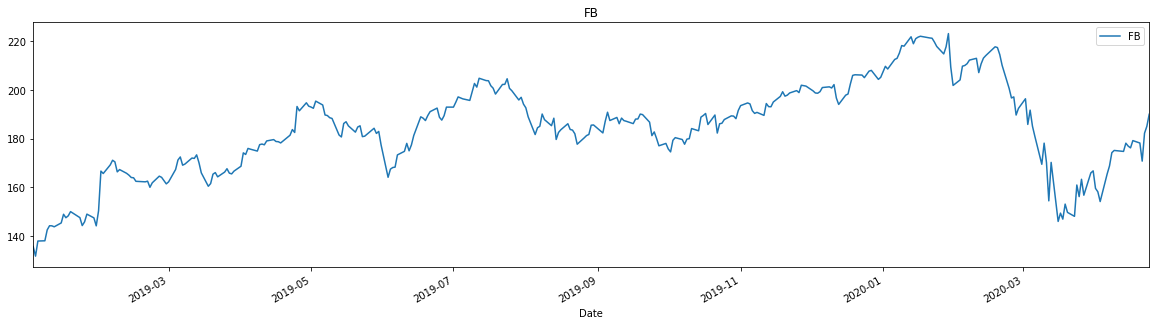

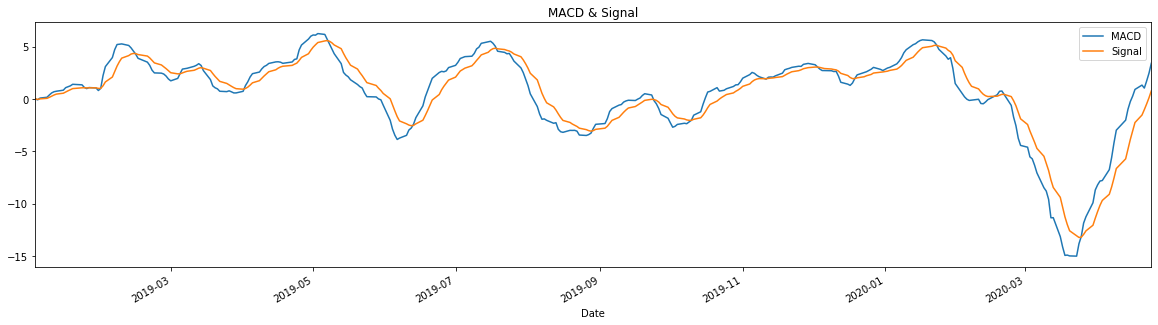

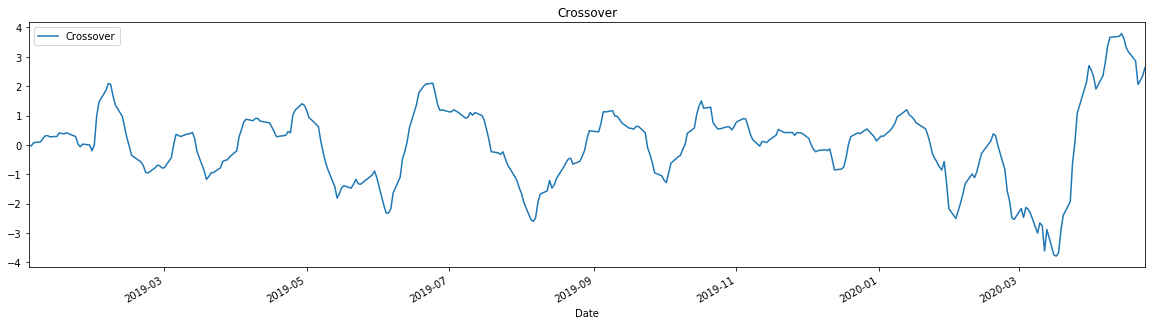

In [11]:
df.plot(y= ['FB'], title='FB', figsize=(20, 5))
df.plot(y= ['MACD', 'Signal'], title='MACD & Signal', figsize=(20, 5))
df.plot(y= ['Crossover'], title='Crossover', figsize=(20, 5))

There you have it! We created our MACD indicator. Here’s the full code:

In [13]:
import pandas as pd
import pandas_datareader as pdr
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

stocks = ['FB']
start = datetime.datetime(2019, 1,1)
end = datetime.date.today()

def get_stock(stock,start,end):
     return pdr.DataReader(stock,'yahoo',start,end)['Close']
    
df = pd.DataFrame({n: get_stock(n, start, end) for n in stocks})

df['30 mavg'] = df['FB'].rolling(window=30).mean()
df['26 ema'] = df['FB'].ewm(span=26).mean()
df['12 ema'] = df['FB'].ewm(span=12).mean()
df['MACD'] = (df['12 ema'] - df['26 ema'])
df['Signal'] = df['MACD'].ewm(span=9).mean()
df['Crossover'] = df['MACD'] - df['Signal']
df.tail()

,FB,30 mavg,26 ema,12 ema,MACD,Signal,Crossover
Date,,,,,,,
2020-04-20,178.240005,164.186001,171.829352,173.148525,1.319173,-1.539971,2.859144
2020-04-21,170.800003,164.229334,171.753104,172.787214,1.034110,-1.025155,2.059265
2020-04-22,182.279999,164.365667,172.532874,174.247642,1.714768,-0.477170,2.191939
2020-04-23,185.130005,164.862001,173.465995,175.921852,2.455857,0.109435,2.346422
2020-04-24,190.070007,166.048667,174.695921,178.098491,3.402570,0.768062,2.634508


So when would you enter the position 😕 ?

# Update - 9/20/17

I received a question from Sam Khorsand about applying the script for multiple stocks. The code below will produce yesterday's MACD Crossover for a list of stocks. Also, by adding 'to_string(index = False'), you can clean up the date formatting. Enjoy!

In [20]:
import pandas as pd
import pandas_datareader as pdr
import datetime
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

def MACD(stock, start, end):
    df = pd.DataFrame(pdr.DataReader(stock,'yahoo',start,end)['Close'])
    df = df.reset_index()
    df['30 mavg'] = df['Close'].rolling(window=30).mean()
    df['26 ema'] = df['Close'].ewm(span=26).mean()
    df['12 ema'] = df['Close'].ewm(span=12).mean()
    df['MACD'] = (df['12 ema'] - df['26 ema'])
    df['Signal'] = df['MACD'].ewm(span=9).mean()
    df['Crossover'] = df['MACD'] - df['Signal']
    return stock, df['Date'][-1:].to_string(),df['Crossover'][-1:].mean()
    

stocks = ['FB', 'AAPL', 'GOOG', 'AMZN', 'TSLA']

d = []

for stock in stocks:
    stock, date, macd = MACD(stock, '1/1/2016', dt.datetime.today())
    d.append({'Stock':stock, 'Date':date, 'MACD':macd})
    
df2 = pd.DataFrame(d)
df2[['Date', 'Stock', 'MACD']]

,Date,Stock,MACD
0,1084 2020-04-24,FB,2.634508
1,1084 2020-04-24,AAPL,2.143967
2,1084 2020-04-24,GOOG,13.114461
3,1084 2020-04-24,AMZN,24.845432
4,1084 2020-04-24,TSLA,15.004806


In [18]:
from IPython.core.display import display, HTML
display(HTML("""<a emailto=mhcrnl@gmail.com>mhcrnl@gmail.com</a>"""))
display(HTML("""<a href=https://www.instagram.com/mhcrnl>Instagram: @mhcrnl</a>"""))